# Background Research

CNNs are a type of deep neural network designed for processing structured grid-like data, primarily used for image recognition, classification, and computer vision tasks.

<b>Applications:</b><br>
Image Classification: Identifying objects or classes within images.
Object Detection: Locating and classifying multiple objects within an image.
Image Segmentation: Dividing an image into meaningful segments for analysis.

Transfer Learning:
CNNs trained on large datasets like ImageNet can be used as a base for other tasks by fine-tuning or feature extraction, saving time and computational resources.

Many variants exist, such as Residual Networks (ResNets), Inception networks, and architectures like U-Net (for segmentation) or YOLO (for object detection), each addressing specific challenges or improving performance in different domains.

<b>Limitations:</b><br>
Data dependency: CNNs require a large amount of labeled data for training, and they might not generalize well to new or unseen data if the dataset is limited or biased.

Overfitting: CNNs, especially with limited data, are prone to overfitting, where the model performs well on training data but fails to generalize to new examples.

# Import libraries

In [2]:
# pip install seaborn

# pip install opencv-python

# pip install numpy

# pip install imblearn

!pip install visualkeras

# pip install Pillow==9.5.0

# pip install tensorflow

# pip install pandas Pillow

# pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip '/content/gdrive/MyDrive/partA_data'

Streaming output truncated to the last 5000 lines.
  inflating: partA_data/train/Pumpkin/0056.jpg  
  inflating: partA_data/train/Pumpkin/0057.jpg  
  inflating: partA_data/train/Pumpkin/0058.jpg  
  inflating: partA_data/train/Pumpkin/0059.jpg  
  inflating: partA_data/train/Pumpkin/0060.jpg  
  inflating: partA_data/train/Pumpkin/0061.jpg  
  inflating: partA_data/train/Pumpkin/0062.jpg  
  inflating: partA_data/train/Pumpkin/0063.jpg  
  inflating: partA_data/train/Pumpkin/0064.jpg  
  inflating: partA_data/train/Pumpkin/0070.jpg  
  inflating: partA_data/train/Pumpkin/0071.jpg  
  inflating: partA_data/train/Pumpkin/0072.jpg  
  inflating: partA_data/train/Pumpkin/0073.jpg  
  inflating: partA_data/train/Pumpkin/0074.jpg  
  inflating: partA_data/train/Pumpkin/0075.jpg  
  inflating: partA_data/train/Pumpkin/0076.jpg  
  inflating: partA_data/train/Pumpkin/0077.jpg  
  inflating: partA_data/train/Pumpkin/0078.jpg  
  inflating: partA_data/train/Pumpkin/0079.jpg  
  inflating: partA

### Import neccessary libraries

In [24]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, save_img,load_img
from sklearn.utils.class_weight import compute_class_weight

#Modelling libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
#import visualkeras as visual_keras
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam


In [25]:
# Finding TensorFlow version
print(tf.__version__)

2.15.0


In [32]:
#define paths for each of the data
train_path = r'partA_data/train'
test_path = r'partA_data/test'
validation_path = r'partA_data/validation'

In [33]:
# function to check if path exists
def check_path(path):
    if os.path.exists(path):
        print(f"Path '{path}' exists.")
        return True
    else:
        print(f"Path '{path}' does not exist.")
        return False


check_path(train_path)
check_path(test_path)
check_path(validation_path)

Path 'partA_data/train' exists.
Path 'partA_data/test' exists.
Path 'partA_data/validation' exists.


True

In [34]:
imgCategory = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']

# EDA

### Check files are read properly

partA_data/train\Bean
partA_data/train\Bitter_Gourd
partA_data/train\Bottle_Gourd
partA_data/train\Brinjal
partA_data/train\Broccoli
partA_data/train\Cabbage
partA_data/train\Capsicum
partA_data/train\Carrot
partA_data/train\Cauliflower
partA_data/train\Cucumber
partA_data/train\Papaya
partA_data/train\Potato
partA_data/train\Pumpkin
partA_data/train\Radish
partA_data/train\Tomato


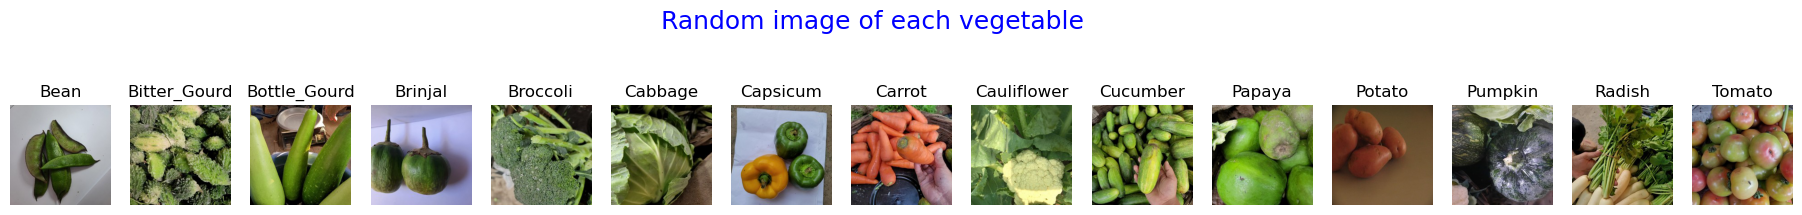

In [35]:
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, len(imgCategory), figsize=(23, 3))

# Iterate through each subfolder
for i, vegetables in enumerate(imgCategory):
    # Path to the current subfolder
    subfolder_path = os.path.join(train_path, vegetables)

    print(subfolder_path)
    # List all files in the subfolder
    files = os.listdir(subfolder_path)

    # Select a random image file
    random_image = random.choice(files)

    # Display the image using matplotlib
    image_path = os.path.join(subfolder_path, random_image)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(vegetables)

# Add a main title to the entire figure
plt.suptitle("Random image of each vegetable", fontsize=18, color='blue')

# Show the matplotlib plot
plt.show()

### Check for class imbalance

In [36]:
def checkImbalance(path):
  # Dictionary to store the class names and counts
  count = {}

  # Iterate through each class folder and count the number of images
  for class_folder in os.listdir(path):
      class_path = os.path.join(path, class_folder)
      if os.path.isdir(class_path):
          images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
          num_images = len(images)
          count[class_folder] = num_images

  # Extract class names and counts
  class_names = list(count.keys())
  count_values = list(count.values())


  # Create a bar chart to visualize class distribution
  plt.figure(figsize=(10, 6))
  sns.barplot(x=class_names, y=count_values, palette="viridis")

  # Set the title to the folder name
  plt.title(f'Class Distribution for {os.path.basename(path)}')

  plt.xlabel('Vegetables')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()



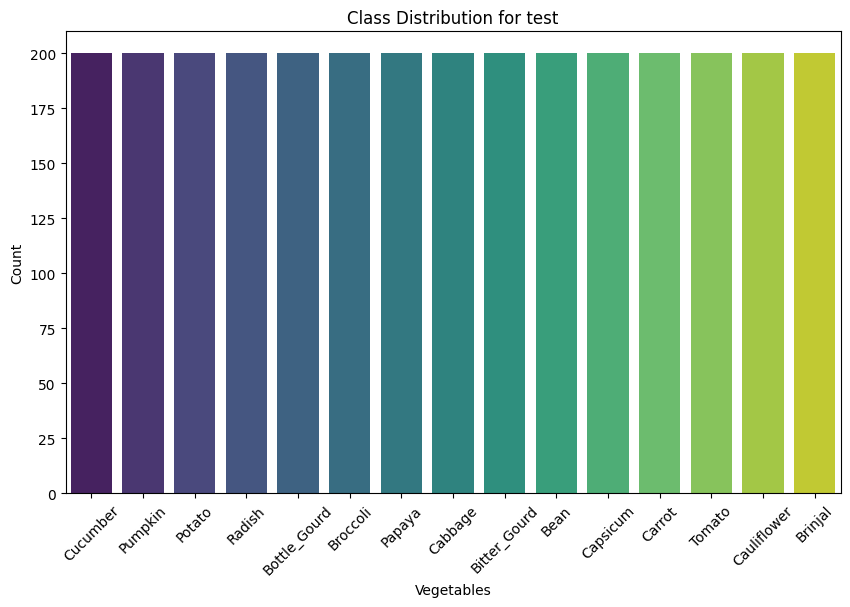

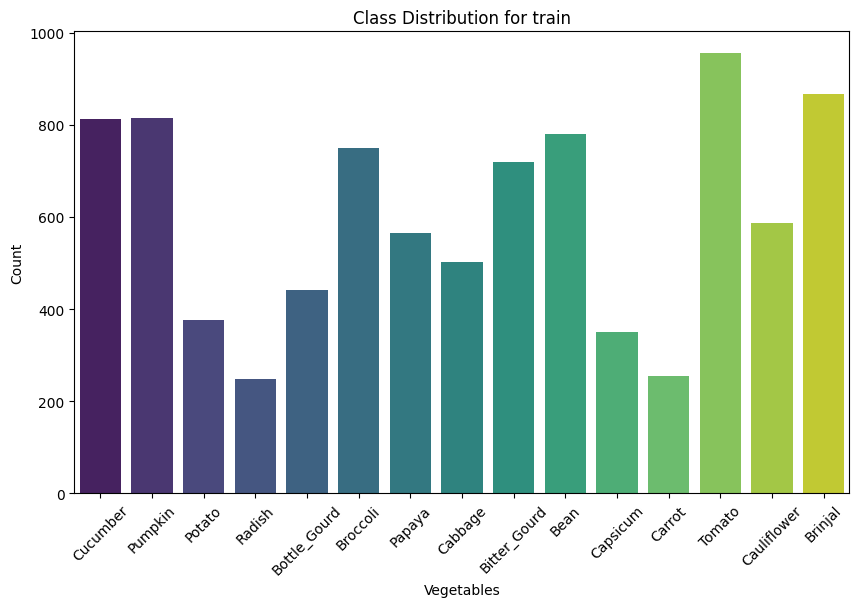

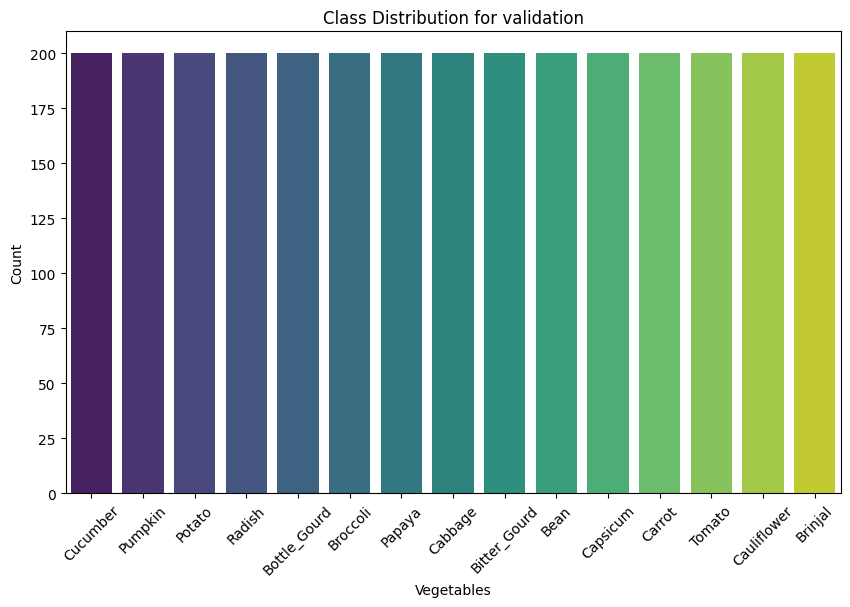

In [12]:
checkImbalance(test_path)
checkImbalance(train_path)
checkImbalance(validation_path)

### Count images

In [37]:
# define function to check how many images are in each folder
def count_items(path):
    total_items = 0

    for foldername, subfolders, filenames in os.walk(path):
        for filename in filenames:
            total_items += 1
    return total_items

In [38]:
count_items(train_path)



9027

In [39]:
count_items(test_path)


3000

In [40]:
count_items(validation_path)

3000

### Check File dimensions

In [41]:
def check_size(path):
    non_matching_images = []  # Store filenames of images not matching size
    non_matching_paths = []  # Store file paths of images not matching size

    for foldername, subfolders, filenames in os.walk(path):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                file_path = os.path.join(foldername, filename)

                try:
                    with Image.open(file_path) as img:
                        width, height = img.size

                        if (width, height) != (224, 224):
                            non_matching_images.append(filename)  # Store non-matching filenames
                            non_matching_paths.append(file_path)  # Store non-matching file paths

                except Exception as e:
                    print(f"Error processing {filename}: {str(e)}")

    if non_matching_images:
        print(f"\nImages not sized 224x224 in {path}:")
        for img_name in non_matching_images:
            print(img_name)
            print(f"Resizing {img_name} to 224x224...")
        resize_images(non_matching_paths)  # Call function to resize non-matching images using their paths

    else:
        print("\nAll images are 224x224 pixels")


In [42]:
# function to resize all images to one standard size 224x224
def resize_images(images, new_size=(224, 224)):
    for img_path in images:
        try:
            with Image.open(img_path) as img:
                resized_img = img.resize(new_size)
                resized_img.save(img_path)
                print(f"Resized {img_path} to {new_size}")
        except Exception as e:
            print(f"Error resizing {img_path}: {str(e)}")


In [43]:
check_size(train_path)



All images are 224x224 pixels


In [44]:
check_size(test_path)



All images are 224x224 pixels


In [45]:
check_size(validation_path)


All images are 224x224 pixels


## Preprocessing

### Convert to grayscale and proper input sizes

In [46]:
# function to convert to grayscale and size
def convert_grayscale(input_folder, width, height):
    grayscale_images = []
    num_converted = 0  # Variable to count the number of items converted

    # Loop through each subfolder in the input folder
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            # Read the image
            input_path = os.path.join(root, file)
            img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image was read successfully
            if img is not None:
                # Resize the image to a common size
                img_resized = cv2.resize(img, (width, height))

                # Append the resized grayscale image to the array
                grayscale_images.append(img_resized)

                # Increment the count of converted images
                num_converted += 1

    print(f"Number of items converted to grayscale: {num_converted}")
    return np.array(grayscale_images)

#### Conversion to 31 x 31 images

In [47]:
grayscale_train31 = convert_grayscale(train_path,31,31)

Number of items converted to grayscale: 9027


In [48]:
grayscale_test31 = convert_grayscale(test_path,31,31)

Number of items converted to grayscale: 3000


In [49]:
grayscale_validation31 = convert_grayscale(validation_path,31,31)

Number of items converted to grayscale: 3000


#### Conversion to 128 x 128 images

In [50]:
grayscale_train128 = convert_grayscale(train_path,128,128)

Number of items converted to grayscale: 9027


In [51]:
grayscale_test128 = convert_grayscale(test_path,128,128)

Number of items converted to grayscale: 3000


In [52]:
grayscale_validation128 = convert_grayscale(validation_path,128,128)

Number of items converted to grayscale: 3000


### Plot images after conversion

In [53]:
def display_grayscale(image, title='', cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(f'Shape: {image.shape}\n{title}')
    plt.axis('off')
    plt.show()

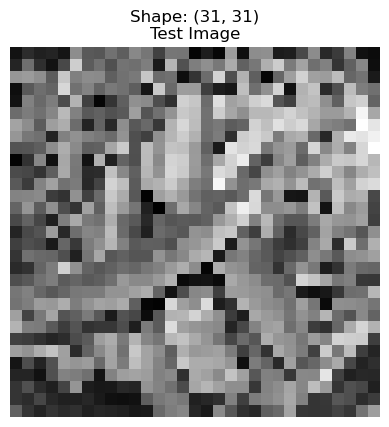

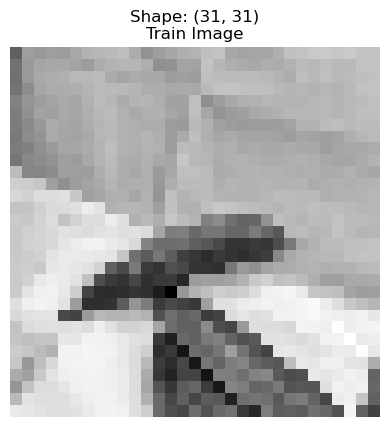

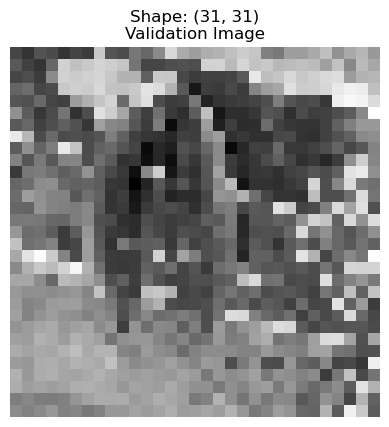

In [54]:
# Display the first image from each dataset with shape
display_grayscale(grayscale_test31[0], title='Test Image')
display_grayscale(grayscale_train31[0], title='Train Image')
display_grayscale(grayscale_validation31[0], title='Validation Image')

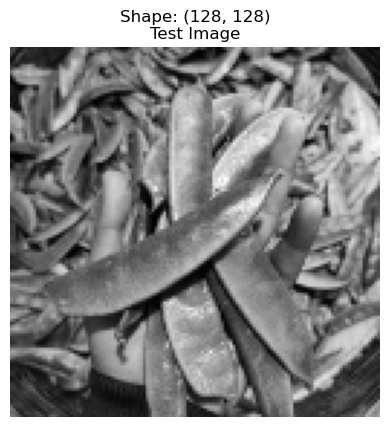

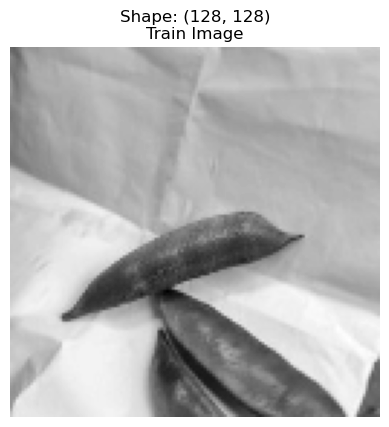

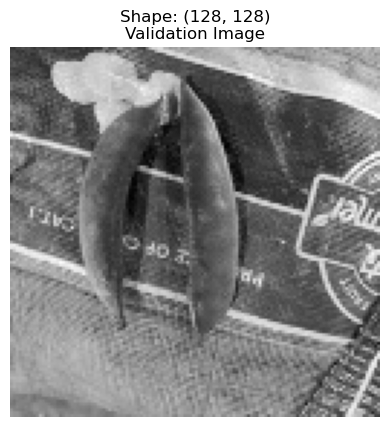

In [55]:
# Display the first image from each dataset with shape
display_grayscale(grayscale_test128[0], title='Test Image')
display_grayscale(grayscale_train128[0], title='Train Image')
display_grayscale(grayscale_validation128[0], title='Validation Image')

### Pixel Scaling

Pixel scaling is useful for:

Numerical Stability: Large pixel values might lead to numerical instability during the training process. Normalizing pixel values to a smaller range, such as [0, 1] or [-1, 1], can help in stabilizing the optimization process.

Convergence Speed: Neural networks often converge faster when input features are within a similar numerical range. Scaling pixel values helps in achieving this consistency, potentially speeding up the convergence of the optimization algorithm.

Model Generalization: Scaling can aid in better generalization of the model to unseen data. It can help the model learn patterns and features more effectively, especially when dealing with images that have varying intensity values.

In [56]:
gs_train_norm31 = grayscale_train31.astype('float32') / 255.0
gs_validation_norm31 = grayscale_validation31.astype('float32') / 255.0
gs_test_norm31 = grayscale_test31.astype('float32') / 255.0

# Print normalized pixel value of the first pixel in the dataset
print(gs_train_norm31[0][0])
print(gs_test_norm31[0][0])
print(gs_validation_norm31[0][0])

[0.33333334 0.5019608  0.4862745  0.5019608  0.49803922 0.5254902
 0.5568628  0.5647059  0.57254905 0.58431375 0.5372549  0.46666667
 0.49803922 0.52156866 0.54509807 0.5568628  0.5882353  0.59607846
 0.5254902  0.5137255  0.5176471  0.5176471  0.54509807 0.5921569
 0.59607846 0.6156863  0.6156863  0.60784316 0.6156863  0.6
 0.6       ]
[0.07450981 0.17254902 0.12941177 0.14117648 0.08627451 0.5137255
 0.33333334 0.31764707 0.41960785 0.34509805 0.49803922 0.43137255
 0.24705882 0.43137255 0.42745098 0.02745098 0.11372549 0.03529412
 0.57254905 0.0627451  0.5137255  0.52156866 0.10588235 0.11764706
 0.27450982 0.50980395 0.15294118 0.21960784 0.4745098  0.07058824
 0.05098039]
[0.3372549  0.27450982 0.38039216 0.3529412  0.2784314  0.32941177
 0.3019608  0.77254903 0.38431373 0.35686275 0.5019608  0.44705883
 0.5647059  0.8235294  0.6745098  0.6313726  0.6862745  0.7058824
 0.74509805 0.78431374 0.7607843  0.5294118  0.50980395 0.6313726
 0.627451   0.6666667  0.74509805 0.5921569  0.6

In [57]:
gs_train_norm128 = grayscale_train128.astype('float32') / 255.0
gs_validation_norm128 = grayscale_validation128.astype('float32') / 255.0
gs_test_norm128 = grayscale_test128.astype('float32') / 255.0

# Print normalized pixel value of the first pixel in the dataset
print(gs_train_norm128[0][0])
print(gs_test_norm128[0][0])
print(gs_validation_norm128[0][0])

[0.34117648 0.32941177 0.3647059  0.40784314 0.45882353 0.47843137
 0.47058824 0.47058824 0.47058824 0.46666667 0.4862745  0.49411765
 0.49803922 0.49803922 0.49803922 0.49803922 0.49411765 0.49411765
 0.49803922 0.50980395 0.52156866 0.5294118  0.53333336 0.5411765
 0.54901963 0.5568628  0.56078434 0.57254905 0.57254905 0.57254905
 0.57254905 0.5686275  0.5686275  0.57254905 0.57254905 0.57254905
 0.5764706  0.5882353  0.6        0.5921569  0.57254905 0.5411765
 0.5058824  0.48235294 0.46666667 0.47843137 0.4745098  0.4862745
 0.49019608 0.49803922 0.50980395 0.5176471  0.5254902  0.53333336
 0.5372549  0.5411765  0.54901963 0.5568628  0.5647059  0.57254905
 0.5764706  0.58431375 0.5764706  0.58431375 0.5803922  0.6039216
 0.6117647  0.59607846 0.58431375 0.60784316 0.6313726  0.6392157
 0.5803922  0.5019608  0.49411765 0.5058824  0.5019608  0.50980395
 0.52156866 0.5176471  0.5058824  0.50980395 0.5137255  0.5176471
 0.5176471  0.5137255  0.5176471  0.52156866 0.54509807 0.5647059
 0

### train, test, validation data


Reshaping:

-1: Retains the number of samples.<br>
128, 128 / 31, 31: Reshapes each image to a 128x128 / 31x31-pixel size.<br>
1: Represents the grayscale channel.

In [58]:
#reshape to correct shape
X_train128 = gs_train_norm128.reshape(-1, 128, 128, 1)
X_val128 = gs_validation_norm128.reshape(-1, 128, 128, 1)
X_test128 = gs_test_norm128.reshape(-1, 128, 128, 1)

X_train31 = gs_train_norm31.reshape(-1, 31, 31, 1)
X_val31 = gs_validation_norm31.reshape(-1, 31, 31, 1)
X_test31 = gs_test_norm31.reshape(-1, 31, 31, 1)

In [59]:
# function to generate labels
def generate_labels(path):
    imgCategory = os.listdir(path)
    class_to_label = {class_name: label for label, class_name in enumerate(imgCategory)}
    labels = []

    for folder_name in imgCategory:
        folder_path = os.path.join(path, folder_name)
        images_in_folder = os.listdir(folder_path)

        label = class_to_label[folder_name]
        labels.extend([label] * len(images_in_folder))
    labels = np.array(labels)
    return labels



In [60]:
# assign labels to y data
y_train128 = generate_labels(train_path)
y_val128 = generate_labels(validation_path)
y_test128 = generate_labels(test_path)

y_train31 = y_train128
y_val31 = y_val128
y_test31 = y_test128

In [63]:
# function to inspect X and y datas
def inspect_data(X, y, data_name):
    print(f"{data_name} - X shape: {X.shape}")
    print(f"{data_name} - y shape: {y.shape}\n")
    print(f"Length of {data_name} - X: {len(X)}")
    print(f"Length of {data_name} - y: {len(y)}\n")
    print(f"Type of {data_name} - X: {type(X)}")
    print(f"Type of {data_name} - y: {type(y)}\n\n")

I ensured that the data types, shapes and length of X and y are compatible to use for model training

In [64]:
inspect_data(X_train128, y_train128, "Training Data")
inspect_data(X_val128, y_val128, "Validation Data")
inspect_data(X_val128, y_test128, "Testing Data")

Training Data - X shape: (9027, 128, 128, 1)
Training Data - y shape: (9027,)

Length of Training Data - X: 9027
Length of Training Data - y: 9027

Type of Training Data - X: <class 'numpy.ndarray'>
Type of Training Data - y: <class 'numpy.ndarray'>


Validation Data - X shape: (3000, 128, 128, 1)
Validation Data - y shape: (3000,)

Length of Validation Data - X: 3000
Length of Validation Data - y: 3000

Type of Validation Data - X: <class 'numpy.ndarray'>
Type of Validation Data - y: <class 'numpy.ndarray'>


Testing Data - X shape: (3000, 128, 128, 1)
Testing Data - y shape: (3000,)

Length of Testing Data - X: 3000
Length of Testing Data - y: 3000

Type of Testing Data - X: <class 'numpy.ndarray'>
Type of Testing Data - y: <class 'numpy.ndarray'>




In [65]:
#inspect datas to ensure they are correct for training

inspect_data(X_train31, y_train31, "Training Data")
inspect_data(X_val31, y_val31, "Validation Data")
inspect_data(X_val31, y_test31, "Testing Data")

Training Data - X shape: (9027, 31, 31, 1)
Training Data - y shape: (9027,)

Length of Training Data - X: 9027
Length of Training Data - y: 9027

Type of Training Data - X: <class 'numpy.ndarray'>
Type of Training Data - y: <class 'numpy.ndarray'>


Validation Data - X shape: (3000, 31, 31, 1)
Validation Data - y shape: (3000,)

Length of Validation Data - X: 3000
Length of Validation Data - y: 3000

Type of Validation Data - X: <class 'numpy.ndarray'>
Type of Validation Data - y: <class 'numpy.ndarray'>


Testing Data - X shape: (3000, 31, 31, 1)
Testing Data - y shape: (3000,)

Length of Testing Data - X: 3000
Length of Testing Data - y: 3000

Type of Testing Data - X: <class 'numpy.ndarray'>
Type of Testing Data - y: <class 'numpy.ndarray'>




There are 15 different types of vegetables in the dataset which represent 15 classes.<br><br>
When dealing with classification problems where there are more than two classes, converting labels to categorical format helps represent each class as a separate binary vector. Each class will have its index marked as 1 while the rest will be 0s.

In [66]:
# Convert labels to categorical format
y_train128 = to_categorical(y_train128, num_classes=15)
y_val128 = to_categorical(y_val128, num_classes=15)
y_test128 = to_categorical(y_test128, num_classes=15)

y_train31 = to_categorical(y_train31, num_classes=15)
y_val31 = to_categorical(y_val31, num_classes=15)
y_test31 = to_categorical(y_test31, num_classes=15)

### Class weights

I have found out earlier that there is class imbalance in the training data.<br>

Class imbalance: When classes in a dataset are not equally represented, the model may become biased towards the majority class. Assigning higher weights to minority classes helps the model pay more attention to these classes and prevent biased predictions.<br>

Performance Improvement: By adjusting class weights, the overall performance metrics of the model can potentially improve, especially in scenarios where certain classes are more important or more challenging to classify.<br>


In [67]:
labels_list = []
# Get a list of all subdirectories (each representing a class)
classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Create a dictionary to store image paths and their corresponding labels
image_labels = {}

# Iterate through each class folder
for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image in images:
        labels_list.append(class_name)

print(labels_list)

['Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean', 'Bean',

In [68]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=imgCategory,
    y=labels_list
)

# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 0.7725288831835687, 1: 0.8358333333333333, 2: 1.364625850340136, 3: 0.6933179723502304, 4: 0.8024, 5: 1.1964214711729622, 6: 1.7145299145299144, 7: 2.35078125, 8: 1.0252129471890972, 9: 0.7411330049261083, 10: 1.063250883392226, 11: 1.596286472148541, 12: 0.7393120393120393, 13: 2.4266129032258066, 14: 0.6301570680628272}


# Modelling

In [85]:
def model_train(model, X_train, y_train, X_val, y_val, batch_size):

    # List of callbacks to be used during model training
    callbacks_list = [
        # Callback to reduce learning rate when validation loss remains the same for up to 2 epochs
        ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 2),

        # Callback to stop training when validation accuracy remains the same for up to 5 epochs
        EarlyStopping(monitor='val_accuracy', patience = 5)
    ]

    # Image data augmentation to enhance training data
    datagen = ImageDataGenerator(
            rotation_range=5,
            width_shift_range=0.1,
            height_shift_range=0.1,
            fill_mode='nearest')

    # Training the model using augmented data and defined callbacks
    """
    history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                             epochs=50,
                             verbose=1,
                             callbacks=callbacks_list,
                             validation_data=(X_val, y_val),
                        class_weight = class_weight_dict)
                        """
    return datagen.flow(X_train, y_train, batch_size=batch_size)



In [86]:
def plot_stats(history):

    # Create a figure with two subplots for Loss and Accuracy plots
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.suptitle('Loss and Accuracy Plots')
    fig.set_figwidth(15)
    fig.set_figheight(5)

    # Retrieve loss and accuracy data from the 'history' object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plot Training and Validation Loss on the first subplot
    ax1.plot(train_loss, label='Training Loss')
    ax1.plot(val_loss, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and validation loss')
    ax1.legend()

    # Plot Training and Validation Accuracy on the second subplot
    ax2.plot(train_acc, label='Training Accuracy')
    ax2.plot(val_acc, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and validation accuracy')
    ax2.legend()

    # Adjust layout to prevent overlapping
    fig.tight_layout()
    # Display the plots
    plt.show()


### 31x31 base model

In [87]:
def base_model31():
    # Create a Sequential model
    model = Sequential()

    # Add a convolutional layer with 8 filters, a 3x3 kernel size, and 'relu' activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(31, 31, 1)))

    # Add a max pooling layer with 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output before feeding into the dense layer
    model.add(Flatten())

    # Output layer with 15 neurons
    model.add(Dense(15, activation='softmax'))

    # Compile the model using 'adam' optimizer, 'categorical_crossentropy' loss, and accuracy as the metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

AttributeError: 'NumpyArrayIterator' object has no attribute 'history'

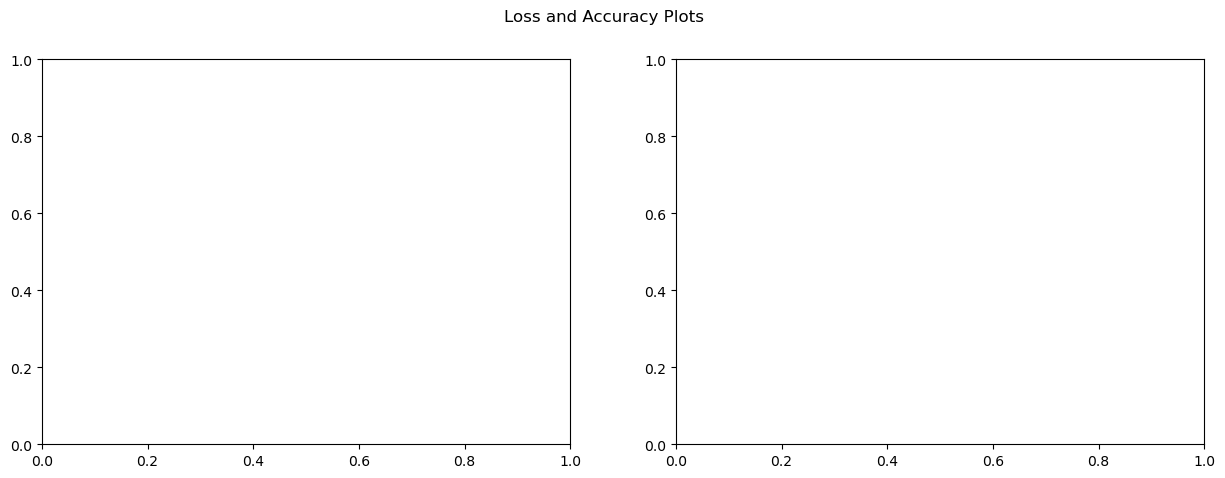

In [88]:
# Create a base model using the base_model31 function
base_31 = base_model31()

# Train the base model using the provided training and validation data
history = model_train(base_31, X_train31, y_train31, X_val31, y_val31, 32)

# Plot training history (loss and accuracy)
plot_stats(history)

In [90]:
history.classes

AttributeError: 'NumpyArrayIterator' object has no attribute 'classes'

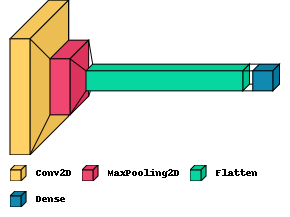

In [47]:
# Generate a visual representation of the model
visual_keras.layered_view(base_31, legend=True)

In [48]:
# Evaluate the trained model on a separate test dataset
evaluation = base_31.evaluate(X_test31, y_test31)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 0s 3ms/step - loss: 2.0554 - accuracy: 0.3410
Test Loss: 2.0554392337799072
Test Accuracy: 0.3409999907016754


### 31x31 Final model

Architecture:<br>
Input: 31x31 grayscale images<br><br>
Convolutional layers:<br>
 3 sets of Conv2D-ReLU pairs: 8 filters (3x3), 64 filters (3x3), 128 filters (3x3)<br>
MaxPooling2D after each pair (2x2 pooling)<br>
Dropout (20%) to prevent overfitting<br>
Fully connected layers: 128 units, 64 units, and output layer with 15 units (softmax)<br><br>
Compilation:<br>
Optimizer: Adam<br>
Loss: Categorical Crossentropy<br>
Metrics: Accuracy<br>

In [49]:
def create_model_31():

    # Create a Sequential model
    model = Sequential()


    # Add a convolutional layer with 8 filters, a 3x3 kernel size, and 'relu' activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(31, 31, 1)))

     # Additional convolutional layers with increased filter sizes and pooling
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output before feeding into the dense layer
    model.add(Flatten())

    # Regularization using dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    # Output layer with 15 neurons
    model.add(Dense(15, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Epoch 1/50
142/142 [==============================] - 9s 31ms/step - loss: 2.7528 - accuracy: 0.1426 - val_loss: 2.5961 - val_accuracy: 0.2187 - lr: 0.0010
Epoch 2/50
142/142 [==============================] - 4s 30ms/step - loss: 2.1401 - accuracy: 0.3488 - val_loss: 2.1316 - val_accuracy: 0.3513 - lr: 0.0010
Epoch 3/50
142/142 [==============================] - 5s 35ms/step - loss: 1.7709 - accuracy: 0.4502 - val_loss: 2.5184 - val_accuracy: 0.3217 - lr: 0.0010
Epoch 4/50
142/142 [==============================] - 4s 28ms/step - loss: 1.5286 - accuracy: 0.5196 - val_loss: 1.8656 - val_accuracy: 0.4327 - lr: 0.0010
Epoch 5/50
142/142 [==============================] - 4s 26ms/step - loss: 1.2169 - accuracy: 0.6113 - val_loss: 1.8045 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 6/50
142/142 [==============================] - 6s 43ms/step - loss: 1.1317 - accuracy: 0.6433 - val_loss: 1.2934 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 7/50
142/142 [==============================] - 4s 28ms/st

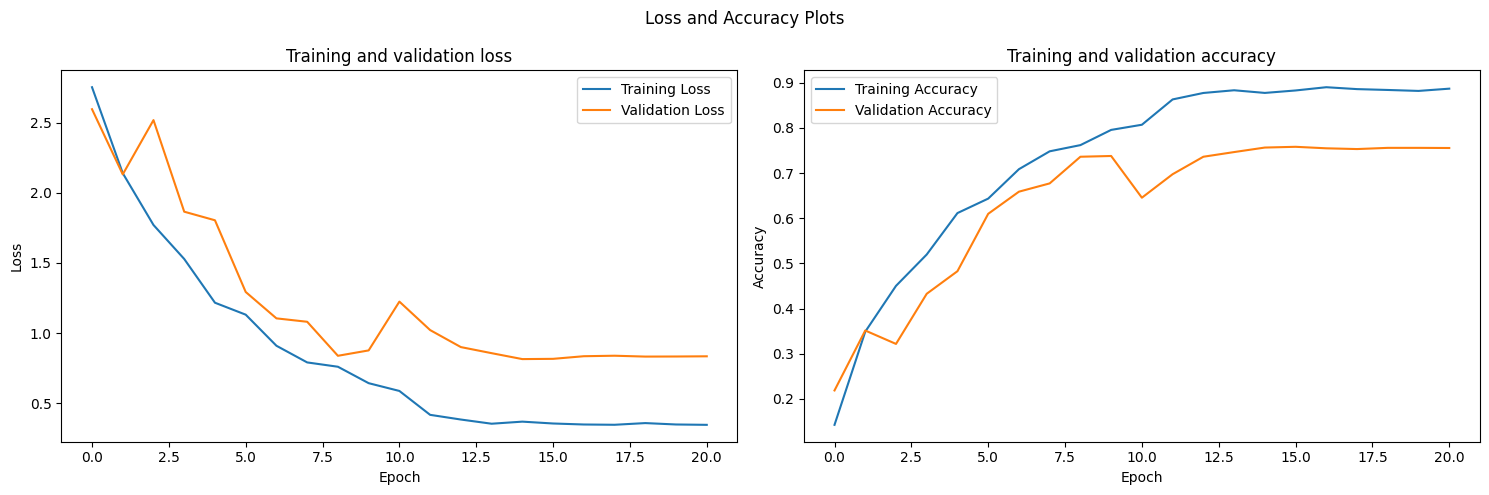

In [50]:
# Create a model using the create_model_31 function
model_31 = create_model_31()

# Train the model using the provided training and validation data
history = model_train(model_31, X_train31, y_train31, X_val31, y_val31, 64)

# Print the test loss and accuracy
plot_stats(history)

This is a visualisation of the model i have built. We can see that there are a total of 12 layers in this model.

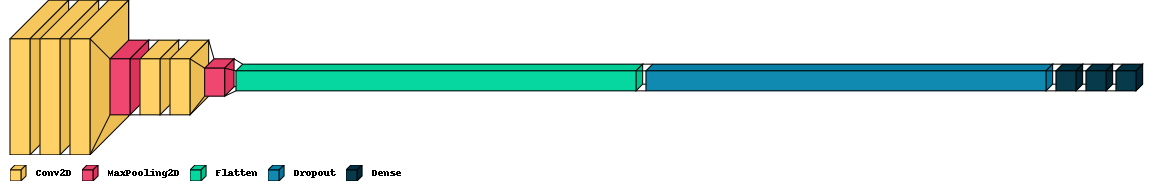

In [51]:
# Generate a visual representation of the model
visual_keras.layered_view(model_31, legend=True)

In [52]:
# Evaluate the trained model on a separate test dataset
evaluation = model_31.evaluate(X_test31, y_test31)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 1s 6ms/step - loss: 0.8543 - accuracy: 0.7580
Test Loss: 0.8543033003807068
Test Accuracy: 0.7580000162124634


### Tune 31x31 Final Model

I did hyperparameter tuning to the model by adjusting the learning rate manually to 0.00095. We can see that there is there is an overall improvement to the model's accuracy and loss.

In [53]:
def tune_model_31():

    # Create a Sequential model
    model = Sequential()


    # Add a convolutional layer with 8 filters, a 3x3 kernel size, and 'relu' activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(31, 31, 1)))  # Change input shape to match your data

    # Additional convolutional layers with increased filter sizes and pooling
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output before feeding into the dense layer
    model.add(Flatten())

    # Regularization using dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    # Output layer with 15 neurons
    model.add(Dense(15, activation='softmax'))

    # Custom optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.00095)

    # Compile the model using the custom optimizer, 'categorical_crossentropy' loss, and accuracy as the metric
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Epoch 1/50
142/142 [==============================] - 6s 26ms/step - loss: 2.7648 - accuracy: 0.1375 - val_loss: 2.4990 - val_accuracy: 0.2057 - lr: 9.5000e-04
Epoch 2/50
142/142 [==============================] - 4s 28ms/step - loss: 2.3366 - accuracy: 0.2928 - val_loss: 2.1178 - val_accuracy: 0.3123 - lr: 9.5000e-04
Epoch 3/50
142/142 [==============================] - 6s 44ms/step - loss: 1.9015 - accuracy: 0.4227 - val_loss: 1.7799 - val_accuracy: 0.4313 - lr: 9.5000e-04
Epoch 4/50
142/142 [==============================] - 4s 26ms/step - loss: 1.5913 - accuracy: 0.5154 - val_loss: 1.4337 - val_accuracy: 0.5687 - lr: 9.5000e-04
Epoch 5/50
142/142 [==============================] - 5s 35ms/step - loss: 1.2718 - accuracy: 0.6112 - val_loss: 1.3971 - val_accuracy: 0.5627 - lr: 9.5000e-04
Epoch 6/50
142/142 [==============================] - 5s 33ms/step - loss: 1.1454 - accuracy: 0.6471 - val_loss: 1.2075 - val_accuracy: 0.6207 - lr: 9.5000e-04
Epoch 7/50
142/142 [====================

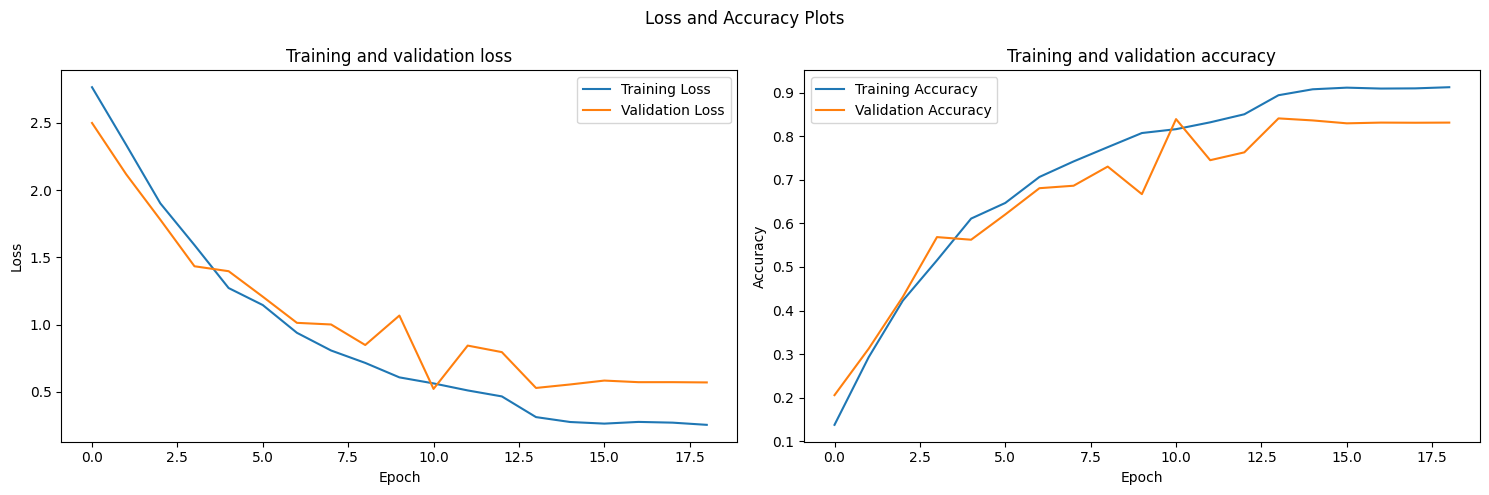

In [54]:
# Create a model using the tune_model_31 function
tuned_model_31 = tune_model_31()

# Train the model using the provided training and validation data
history = model_train(tuned_model_31, X_train31, y_train31, X_val31, y_val31, 64)

# Plot training history (loss and accuracy)
plot_stats(history)

In [55]:
# Evaluate the trained model on a separate test dataset
evaluation = tuned_model_31.evaluate(X_test31, y_test31)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 0s 5ms/step - loss: 0.5687 - accuracy: 0.8303
Test Loss: 0.5687216520309448
Test Accuracy: 0.8303333520889282


In [56]:
# Save the model weights
tuned_model_31.save_weights('model_cnn31_weights.h5')

### 128x128 base model

In [57]:
def base_model128():
    # Create a Sequential model
    model = Sequential()

    # Add a convolutional layer with 8 filters, a 3x3 kernel size, and 'relu' activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)))\

    # Add a max pooling layer with 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output before feeding into the dense layer
    model.add(Flatten())

    # Output layer with 15 neruons
    model.add(Dense(15, activation='softmax'))

    # Compile the model using the custom optimizer, 'categorical_crossentropy' loss, and accuracy as the metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Epoch 1/50
283/283 [==============================] - 17s 56ms/step - loss: 2.6902 - accuracy: 0.2619 - val_loss: 2.1466 - val_accuracy: 0.3090 - lr: 0.0010
Epoch 2/50
283/283 [==============================] - 14s 49ms/step - loss: 1.9955 - accuracy: 0.4179 - val_loss: 1.8063 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 3/50
283/283 [==============================] - 16s 55ms/step - loss: 1.8371 - accuracy: 0.4637 - val_loss: 1.6781 - val_accuracy: 0.4840 - lr: 0.0010
Epoch 4/50
283/283 [==============================] - 15s 54ms/step - loss: 1.7328 - accuracy: 0.4936 - val_loss: 1.6937 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 5/50
283/283 [==============================] - 15s 52ms/step - loss: 1.6794 - accuracy: 0.5092 - val_loss: 1.4577 - val_accuracy: 0.5713 - lr: 0.0010
Epoch 6/50
283/283 [==============================] - 15s 54ms/step - loss: 1.6243 - accuracy: 0.5271 - val_loss: 1.4285 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/50
283/283 [==============================] - 16s 

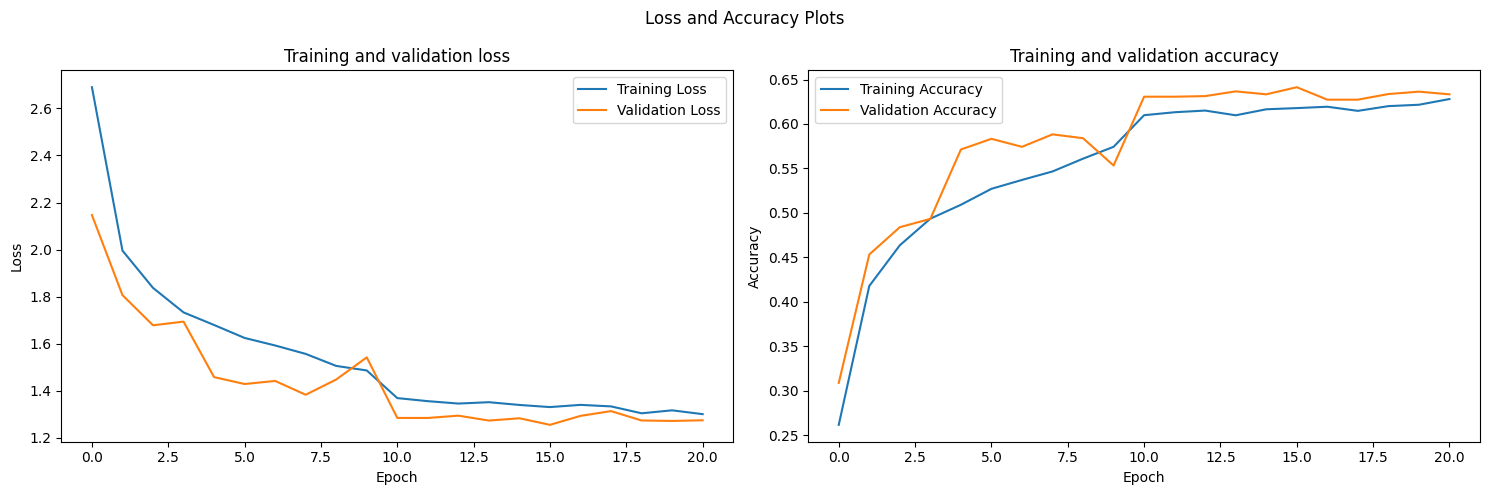

In [58]:
# Create a model using the base_model128 function
base_128 = base_model128()

# Train the model using the provided training and validation data
history = model_train(base_128, X_train128, y_train128, X_val128, y_val128, 32)

# Plot training history (loss and accuracy)
plot_stats(history)

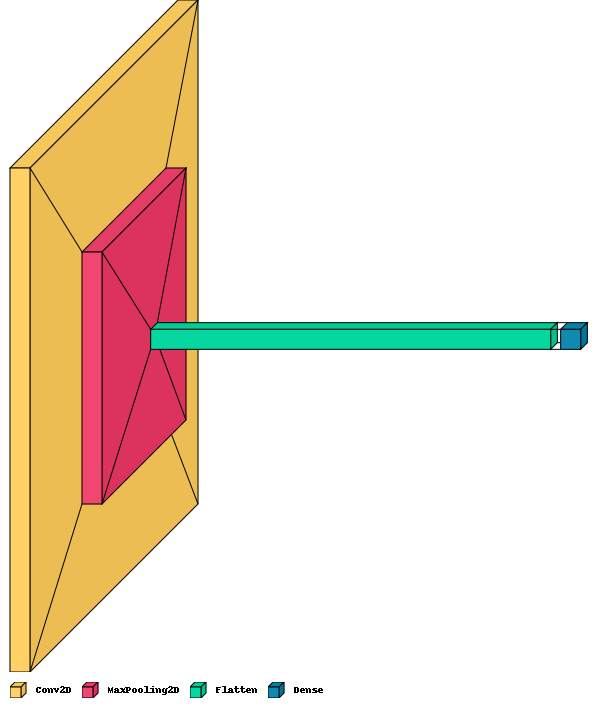

In [59]:
# Generate a visual representation of the model
visual_keras.layered_view(base_128, legend=True)

In [60]:
# Evaluate the trained model on a separate test dataset
evaluation = base_128.evaluate(X_test128, y_test128)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 0s 5ms/step - loss: 1.2245 - accuracy: 0.6330
Test Loss: 1.2245122194290161
Test Accuracy: 0.6330000162124634


### Final 128x128 Model architecture




Architecture:<br>
Input: 128x128 grayscale images<br>
Convolutional layers:<br>
Three Conv2D-ReLU pairs: 32 filters (3x3), 64 filters (3x3), 128 filters (3x3)<br>
MaxPooling2D (2x2 pooling) after each convolutional layer<br>
Flatten layer for transition to dense layers<br><br>
Dense layers:<br>
512 units with ReLU activation<br>
Dropout (50%) for regularization<br>
Output layer with 15 units (softmax)<br><br>
Compilation:<br>
Optimizer: Adam<br>
Loss: Categorical Crossentropy<br>
Metrics: Accuracy

In [61]:
def create_model_128():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer to feed into densely connected layers
    model.add(Flatten())

    # Dense layers
    model.add(Dense(512, activation='relu'))

    # Regularization using dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output layer with 15 neruons
    model.add(Dense(15, activation='softmax'))

    # Model compilation with optimizer, loss function, and metrics
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



Epoch 1/50
283/283 [==============================] - 19s 62ms/step - loss: 2.5296 - accuracy: 0.2168 - val_loss: 2.0818 - val_accuracy: 0.3293 - lr: 0.0010
Epoch 2/50
283/283 [==============================] - 17s 60ms/step - loss: 1.8802 - accuracy: 0.4371 - val_loss: 1.5427 - val_accuracy: 0.5323 - lr: 0.0010
Epoch 3/50
283/283 [==============================] - 17s 60ms/step - loss: 1.4845 - accuracy: 0.5522 - val_loss: 1.4273 - val_accuracy: 0.5427 - lr: 0.0010
Epoch 4/50
283/283 [==============================] - 18s 63ms/step - loss: 1.1489 - accuracy: 0.6383 - val_loss: 1.1487 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 5/50
283/283 [==============================] - 17s 61ms/step - loss: 0.9840 - accuracy: 0.6995 - val_loss: 0.9395 - val_accuracy: 0.7153 - lr: 0.0010
Epoch 6/50
283/283 [==============================] - 17s 61ms/step - loss: 0.8346 - accuracy: 0.7387 - val_loss: 0.8310 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 7/50
283/283 [==============================] - 17s 

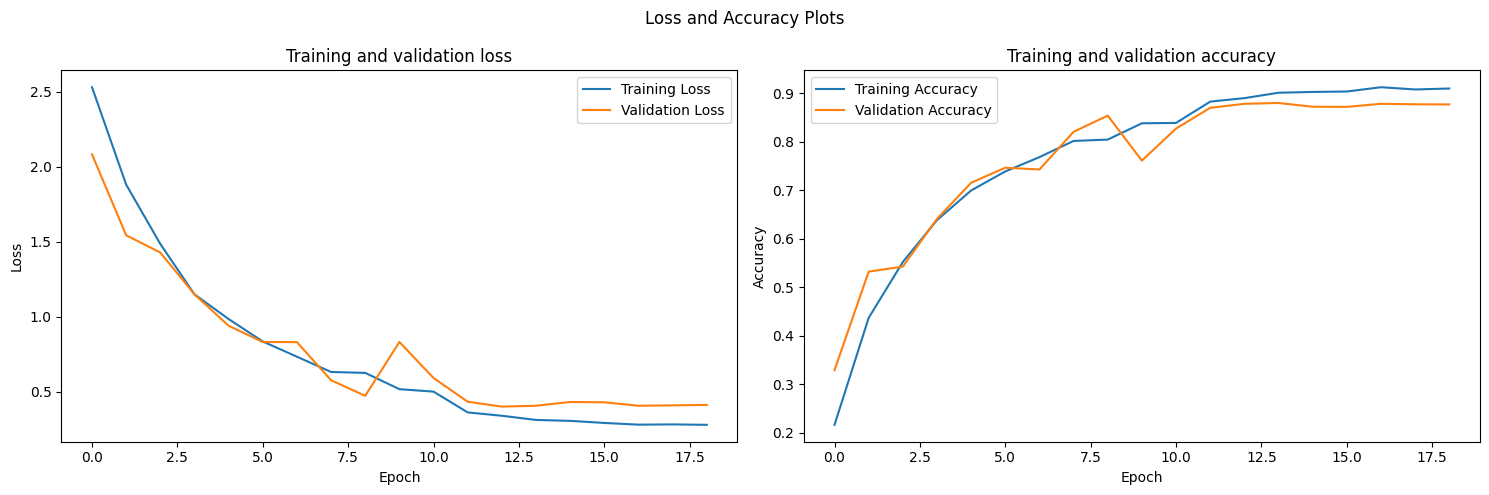

In [69]:
# Create a model using the create_model_128 function
model_128 = create_model_128()

# Train the model using the provided training and validation data
history = model_train(model_128, X_train128, y_train128, X_val128, y_val128, 32)

# Plot training history (loss and accuracy)
plot_stats(history)

This is a visualisation of the model i have built. We can see that there are a total of 10 layers in this model.

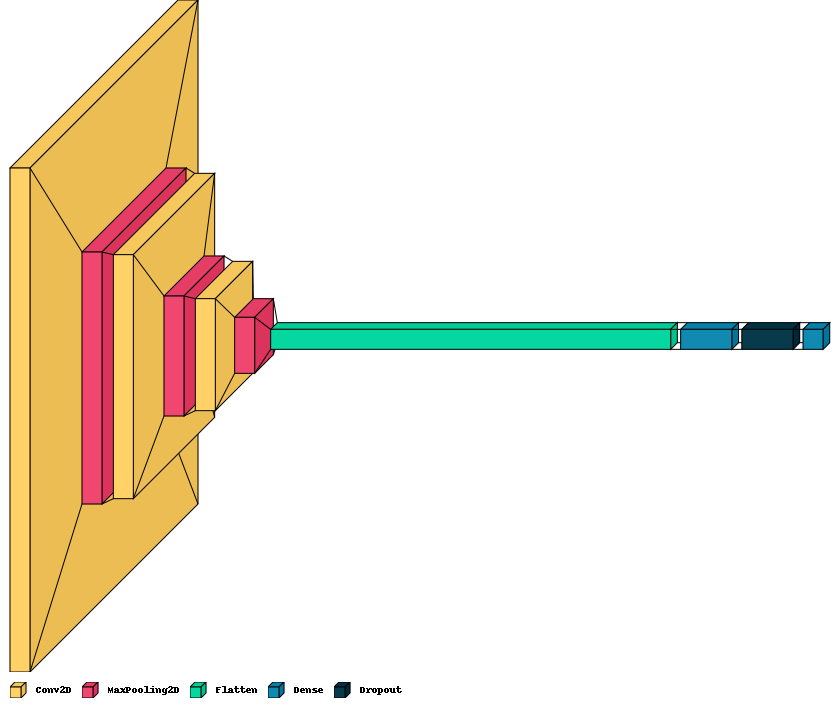

In [63]:
# Generate a visual representation of the model
visual_keras.layered_view(model_128, legend=True)

In [70]:
# Create a model using the model_128 function
evaluation = model_128.evaluate(X_test128, y_test128)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 1s 7ms/step - loss: 0.4321 - accuracy: 0.8800
Test Loss: 0.432142049074173
Test Accuracy: 0.8799999952316284


### Tune 128x128 Final Model

I did hyperparameter tuning to the model by adjusting the learning rate manually to 0.0005. We can see that there is there is an overall improvement to the model's accuracy and loss.

In [65]:
def tune_model_128():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer to feed into densely connected layers
    model.add(Flatten())

    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))  # Adding dropout for regularization
    model.add(Dense(15, activation='softmax'))  # Output layer

    # Custom optimizer with a specific learning rate
    optimizer = Adam(learning_rate=0.0005)

    # Compile the model using the custom optimizer, 'categorical_crossentropy' loss, and accuracy as the metric
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



In [72]:
tuned_model_128 = tune_model_128()
history = model_train(tuned_model_128, X_train128, y_train128, X_val128, y_val128, 32)

plot_stats(history)

In [67]:
# Create a model using the tuned_model_128 function
evaluation = tuned_model_128.evaluate(X_test128, y_test128)

# Print the test loss and accuracy
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

94/94 [==============================] - 1s 8ms/step - loss: 0.3362 - accuracy: 0.9017
Test Loss: 0.3361850082874298
Test Accuracy: 0.9016666412353516


In [ ]:
# Save the model weights
tuned_model_128.save_weights('model_cnn128_weights.h5')